In [1]:
using Pkg
Pkg.activate("../.")

  Activating project at `~/Documents/code/julia/CompFin/notebooks`


In [2]:
using CompFin: GBM, compute_runge_kutta_step, simulate_path, simulate_mc_paths

In [3]:
# Setup

mu = 0.05;
sigma = 0.2;
gbm = GBM(mu, sigma);
x0 = 100.0;

T = 1.0;
n_steps = 100;
dt = T/n_steps;
n_paths = 10000;

In [4]:
xt_stepwise = simulate_mc_paths(gbm, x0, dt, compute_runge_kutta_step, n_steps, n_paths, false);
xt_pathwise = simulate_mc_paths(gbm, x0, dt, compute_runge_kutta_step, n_steps, n_paths, true);

In [5]:
# Let's check that both simulations return the same shapes i.e. 1000 paths and 101 values (1 initial and 100 simulated ones)
size(xt_stepwise) == size(xt_pathwise)

true

In [6]:
using Plots
using Random: randsubseq

In [7]:
function plot_paths(paths_matrix::Matrix{Float64}; fps=15)
    a = Animation()
    n_steps = size(paths_matrix)[2] - 1
    plt = plot(title="Simulated paths", legend=false, xlim=(1, n_steps + 1), ylim=(minimum(paths_matrix), maximum(paths_matrix)), xlabel="Step", ylabel="Value")
    for i in 1:n_steps + 1
        plt = plot(collect(1:i), paths_matrix[:, 1:i]', title="Simulated paths", legend=false, xlim=(1, n_steps + 1), ylim=(minimum(paths_matrix), maximum(paths_matrix)), xlabel="Step", ylabel="Value")
        frame(a, plt)
    end
        
    gif(a, fps=fps)
end

plot_paths (generic function with 1 method)

┌ Info: Saved animation to /tmp/jl_yjuLgVuPKp.gif
└ @ Plots /home/martin/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_yjuLgVuPKp.gif")
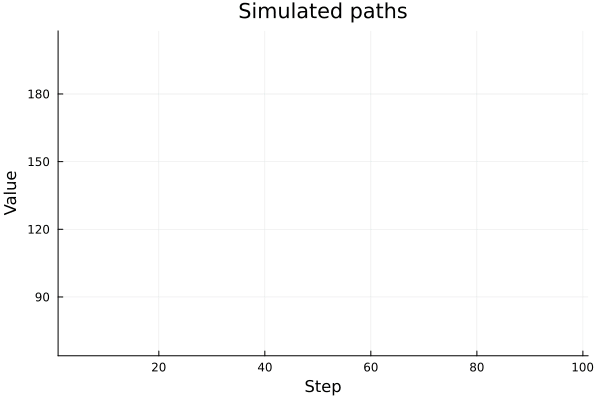

In [8]:
plot_paths(xt_stepwise[randsubseq(1:n_paths, 0.005), :])